# Setup
- Install some basic Jupyter notebook environment, for Python 3. Easy in Linux. 
    - Consider Anaconda in Windows and Mac, though it uses a substatial amount of space.
    - If you cannot, then you can still view the notebooks online through a link in the course.
        - Notebooks will display mostly correctly as HTML (a few things do not)
        - This is one of the reasons I like these for smaller examples
- Install python-graphviz

# Exponentiation Examples for different strategies
## Purpose:
1. To demonstrate different strategies for a relatively simple problem
    - Not all strategies "yield" improvement over the Brute Force approach, and probably make them less efficient due to extra complexity (recursive calls, extra space, etc.)
    - But an algorithm design strategy, even if ineffective, allows you to look at the problem differently and may reveal a better approach
1. To get you used to basic Python Syntax, as most of you have not spent much or any time with it. This will be quite useful for me to generate additional examples where I don't think a C++ version is particularly helpful. Python is:
    - \+ Readable, typically easy to read for those with an imperative language background (C,C++,Java)
    - \+ Writable, easy to write
        - \+ white space sensitive: good for *readability*
        - \- white space sensitive: tends to be rough when coming from C-style languages (C, C++, Java) at first
        - \+ good, extensive libraries for many varied tasks
            - used for deep learning libraries, data visualization (often in Jupyter notebooks), etc.
            - also a very helpful tool for programming tasks, like manipulating folders, etc.
    - \+ has useful data structures *without including libraries* such as lists (__[like Java ArrayList, C++ vector](https://en.wikipedia.org/wiki/Dynamic_array)__), which are really interesting data structures in their own right and will likely be covered at some point, and **dict**ionaries (hash tables)
1. To get you used to basic Jupyter notebook usage. This is a great way for me to share code/examples with you. __[(command cheat sheet)](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)__
1. This is a general review of 
    - CSCE 146 topics, like $O(\cdot),\Theta(\cdot)$ notation
    - a few Math symbols
        

## Brute Force
The definition of **brute force** we are using here is the "straight forward/from the defintion" (of exponentiation) one, and not the "exhaustive search" definition.

In [198]:
def print_no_nl(s):
    """
    Prints input as string without newline
    Input: something printable, will be converted to string, if not already
    (this is just a little helper function)
    """
    print(str(s),end='')

def bf_exponentation(a, p): # function definition
    """
    Brute Force Exponentiation
    a -- the number being raised to a power
    p -- the non-negative, integral power a is being raised to
    """
    power = 1 
    print_no_nl(1) 
    while p > 0:
        power = power * a
        p = p-1
        print_no_nl("*" + str(a))
    
    return power
    

In [199]:
bf_exponentation(10,2)

1*10*10

100

In [200]:
bf_exponentation(2,10)

1*2*2*2*2*2*2*2*2*2*2

1024

Also, a reminder that $2^{10} \approx 10^3$
- great to remember that when working with binary and you need to actually do calculations, approximately, which may occasionally come up in class, though more often in networking (CSCE 416), maybo OS (CSCE 311), and hardware courses 
- e.g. $2^{23}=2^3\times 2^{10} \times 2^{10} \approx 2^3 \times 10^6 = 8 000 000 $ 
- (oh, and I can do $\LaTeX$ in Jupyter notebooks too... forgot about that, which is *great* for Chapter 2) 

In [201]:
bf_exponentation(5,1)

1*5

5

In [202]:
bf_exponentation(25,0)

1

1

What's *missing* so far, versus Java/C++?

**Types** are missing, as in declaring your types for **static** (compile-time) type checking like in Java/C++
- Python *does* do type checking, but it is **dynamically** typed, meaning it is checking at runtime; Python's type system is also described as "duck typing"
    - \+ Do not have to declare types in code (if the functions/operators work/exist, the code will run)
    - \+ Do not have to do tempates (generic programming as in C++/Java)
    - \- Can be bad if your code runs for days before hitting problem code and crashing out, e.g. in deep learning
    - (we will see some C++ examples using the **auto** keyword that offer a third option -- type inference)
- So, we can use the above code to do stuff like

In [203]:
bf_exponentation(0.5,3)

1*0.5*0.5*0.5

0.125

In case you're paranoid there's some formatting trickery, like displaying 1.0 as "1", here you go:

In [204]:
type(bf_exponentation(0.5,3))

1*0.5*0.5*0.5

float

In [205]:
type(bf_exponentation(2,3))

1*2*2*2

int

## Decrease-by-*Constant*-and-Conquer
- Constant here, and typically, is just $1$
- This maps to a recursive approach, e.g.

 $3^4 = 3\times 3^3$
 
  $= 3\times 3\times 3^2$
  
  $= 3\times 3\times 3\times 3^1$
  
  $= 3\times 3\times 3\times 3\times 3^0$

Or, more generally,

$  a^p = \begin{cases} a\times a^{p-1} & p>0 \\ 1 & p=0 \end{cases} $

Defining recursively:

In [206]:
def recursive_exponentiation(a,p):
    """
    Decrease by a constant and conquer, basic recursive approach to exponentiation
    a -- the number being raised to a power
    p -- the non-negative, integral power a is being raised to
    """
    if p == 0:
        print_no_nl(1)
        return 1
    else:         
        print_no_nl(str(a)+"*(")
        
        a_to_p_minus_1 = recursive_exponentiation(a,p-1)
        
        print_no_nl(")")
        return a*a_to_p_minus_1

In [207]:
recursive_exponentiation(3,4)

3*(3*(3*(3*(1))))

81

Well, is this any good?

From an implementation standpoint, probably *not*. Why?
- Well, we are going to make a bunch of recursive calls.
- Recursive calls are going to be more expensive than looping (iteration)
    - a recursive function call is more expensive in *time* and *space* than iteration, generally, because
        - updating the counter variable and jumping is going to be quicker than making a new stack frame and returning from it, but this is not a big deal here since they are "merely" $O(1)$, a constant, amount of extra time (a simple factor difference of one another
        - the basic recursive approach also needs $O(p)$ extra space because there will be $p+1$ total calls on the stack, i.e.
            - the initial call
            - and $p$ recursive calls, down to $0$
            - none of the calls *pop off the stack* until the "base case", $p=0$ case, is hit. (When recursive calls "pop off the stack" is important to remember when we look at some other strategies, in particular Divide and Conquer). 
        - This difference *may* be obviated by tail call optimization, depending on
            - how you wrote the code
            - your compiler and optimization level
            - ... but pessimists are rarely disappointed
            - (note the iterative version above "accumulates" the partial solution in the variable power)





\* "not a big deal" because we are generally only concerned with non-constant differences between algorithms, e.g. $O(\log n)$ vs. $O(n)$ vs. $O(n \log n)$ etc... . We worry about the constant time differences, generally, *only* when we have algorithms of the *same* order of growth, the algorithms have the same "Big-O", worst case or average case.

I'll harp in this with chapter 2, but one rule of thumb is to 
> Always pick the most efficient asymptotic growth algorithm algorithm if there is *any* question what the input size will be (or if it can possibly change).

A *constant* time difference of even $10$ will not be noticed before the difference between $O(n \log n)$ and $O(n^2)$ on even modest size inputs, like say a $n=10^6=\text{"one million"}\approx 2^{20}$. 


Incidentally, the base on logarithms for most algorithms is generally $2$, i.e., $\log_2 n$ because we generally split in *half*, but that does not matter (proven with chapter 2 limits, e.g. $f(n) = log_2 n, f(n) \in \Theta(log_{10} n)$ ), so we can fudge the numbers a bit and just point out that
- $n^2=(10^6)^2=10^{12}=1,000,000,000,000$
- $n \log_2 n = 10^6 \times \log_2 10 \approx 10^6 \times \log_2 2^{20} = 10^6 \times 20 = 20,000,000$
- "fudge" here means we will "ignore the constants"
- "does not matter" means to "within a constant" again, $O(1)$ difference
- Remember: Exponentiation and logarithms are *inverses* of one another, a very relevant fact in this class.
- Remember: $f(n) \in \Theta(g(n ))$ means $f(n)$ and $g(n)$ have the same order of growth, they grow within a constant of one another *asymptotically* ("as $n$ goes to infinity" or, informally, "on large input sizes").
- Do not worry if you forgot or did not quite get this in CSCE 146, we will review this carefully with chapter 2, soon.

Let's look at an output again:

In [208]:
recursive_exponentiation(3,4)

3*(3*(3*(3*(1))))

81

Okay, from a theoretical standpoint, did the the Decrease-by-a-Constant-and-Conquer approach help us?

It might, if you look at the explicit parethesization and you remember the associative property of multiplication, basically meaning we can do the multiplications in any order (by "moving the parentheses"). So, maybe we try a Divide and Conquer Approach, and solve it like this:

$3^4 = (3^2)*(3^2) = ((3^1)*(3^1))*((3^1)*(3^1)) = 81$

or, more generally,

$a^p = \begin{cases} a^{\lceil \frac{p}{2} \rceil}\times a^{\lfloor \frac{p}{2} \rfloor} & p>1 \\ a & p =1 \\ 1 &p =0 \end{cases} $

In [209]:
import math

def divide_and_conq_exponentiation(a,p):
    """
    Divide and conquer, basic recursive approach to exponentiation
    a -- the number being raised to a power
    p -- the non-negative, integral power a is being raised to
    """
    if p > 1:
        print_no_nl("(")
        a_to_ceiling_half_p = divide_and_conq_exponentiation(a,math.ceil(p/2))
        print_no_nl(")*(")
        a_to_floor_half_p = divide_and_conq_exponentiation(a,math.floor(p/2))
        print_no_nl(")")
        return a_to_ceiling_half_p * a_to_floor_half_p
    elif p == 1:
        print_no_nl(a)
        return a
    elif p == 0:
        print_no_nl(1)
        return 1
    else:         
        raise Exception("p must be integral and nonnegative")

In [210]:
divide_and_conq_exponentiation(3,4)

((3)*(3))*((3)*(3))

81

So, is this Divide and Conquer approach any good? It still 
1. has the same number of multiplies,
2. and is recursive
so was there any benefit?

There was, actually, versus the Decrease by 1 and Conquer version. It uses less memory for large powers. If you think about recursion temporally, then we actually only have to worry about the *depth* of recursion for this w.r.t. ("with respect to") space.

It is obvious that the Decrease by 1 and Conquer version, when it gets to the base case of 

In [211]:
recursive_exponentiation(3,5)

3*(3*(3*(3*(3*(1)))))

243

will have a stack like

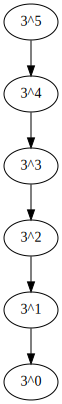

In [212]:
from graphviz import Digraph

dot = Digraph()

dot.node('p5','3^5')
dot.node('p4','3^4')
dot.node('p3','3^3')
dot.node('p2','3^2')
dot.node('p1','3^1')
dot.node('p0','3^0')

dot.edge('p5','p4')
dot.edge('p4','p3')
dot.edge('p3','p2')
dot.edge('p2','p1')
dot.edge('p1','p0')


display(dot)

and 

In [213]:
divide_and_conq_exponentiation(3,5)

(((3)*(3))*(3))*((3)*(3))

243

will, accumulated *over time*, something that looks like 

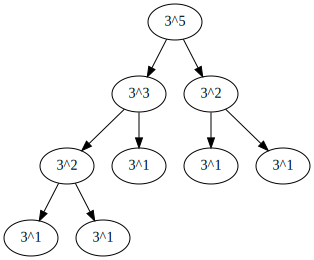

In [214]:
dot = Digraph()

dot.node('p5','3^5')
dot.node('p3','3^3')
dot.node('p2ll','3^2')
dot.node('p2r','3^2')
dot.node('p1lll','3^1')
dot.node('p1llr','3^1')
dot.node('p1lr','3^1')
dot.node('p1rr','3^1')
dot.node('p1rl','3^1')

dot.edge('p5','p3')
dot.edge('p3','p2ll')
dot.edge('p2ll','p1lll')
dot.edge('p2ll','p1llr')
dot.edge('p3','p1lr')
dot.edge('p5','p2r')
dot.edge('p2r','p1rl')
dot.edge('p2r','p1rr')


display(dot)

But, over time it looks more like

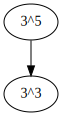

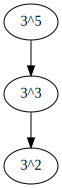

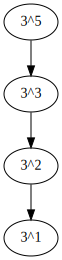

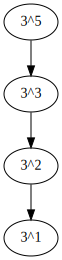

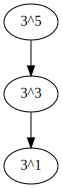

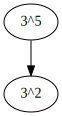

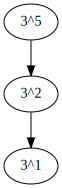

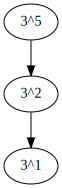

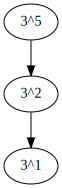

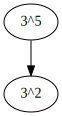

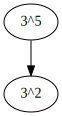

In [215]:
dot = Digraph()

dot.node('p5','3^5')
dot.node('p3','3^3')


dot.edge('p5','p3')



display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p3','3^3')
dot.node('p2ll','3^2')


dot.edge('p5','p3')
dot.edge('p3','p2ll')

display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p3','3^3')
dot.node('p2ll','3^2')
dot.node('p1lll','3^1')

dot.edge('p5','p3')
dot.edge('p3','p2ll')
dot.edge('p2ll','p1lll')

display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p3','3^3')
dot.node('p2ll','3^2')
dot.node('p1llr','3^1')

dot.edge('p5','p3')
dot.edge('p3','p2ll')
dot.edge('p2ll','p1llr')

display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p3','3^3')
dot.node('p1lr','3^1')

dot.edge('p5','p3')
dot.edge('p3','p1lr')



display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p2r','3^2')


dot.edge('p5','p2r')


display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p2r','3^2')
dot.node('p1rl','3^1')


dot.edge('p5','p2r')
dot.edge('p2r','p1rl')


display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p2r','3^2')
dot.node('p1rl','3^1')


dot.edge('p5','p2r')
dot.edge('p2r','p1rl')


display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p2r','3^2')
dot.node('p1rr','3^1')


dot.edge('p5','p2r')
dot.edge('p2r','p1rr')


display(dot)

dot = Digraph()

dot.node('p5','3^5')
dot.node('p2r','3^2')

dot.edge('p5','p2r')

display(dot)

dot.node('p5','3^5')


display(dot)

...perhaps better drawn as:

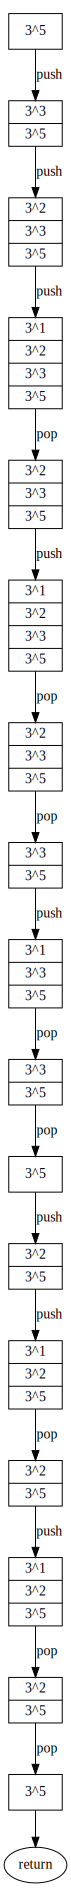

In [216]:
dot = Digraph()

dot.node('1', "3^5",shape='record')
dot.node('2', "{3^3 | 3^5}",shape='record')
dot.node('3', "{3^2 |3^3 | 3^5}",shape='record')
dot.node('4', "{3^1 |3^2 |3^3 | 3^5}",shape='record')
dot.node('5', "{3^2 |3^3 | 3^5}",shape='record')
dot.node('6', "{3^1 |3^2 |3^3 | 3^5}",shape='record')
dot.node('7', "{3^2 |3^3 | 3^5}",shape='record')
dot.node('8', "{3^3 | 3^5}",shape='record')
dot.node('9', "{3^1 |3^3 | 3^5}",shape='record')
dot.node('10', "{3^3 | 3^5}",shape='record')
dot.node('11', "3^5",shape='record')
dot.node('12', "{3^2 | 3^5}",shape='record')
dot.node('13', "{3^1 | 3^2 | 3^5}",shape='record')
dot.node('14', "{3^2 | 3^5}",shape='record')
dot.node('15', "{3^1 | 3^2 | 3^5}",shape='record')
dot.node('16', "{3^2 | 3^5}",shape='record')
dot.node('17', "{3^5}",shape='record')

dot.node("return")

dot.edge('1','2',label="push")
dot.edge('2','3',label="push")
dot.edge('3','4',label="push")
dot.edge('4','5',label="pop")
dot.edge('5','6',label="push")
dot.edge('6','7',label="pop")
dot.edge('7','8',label="pop")
dot.edge('8','9',label="push")
dot.edge('9','10',label="pop")
dot.edge('10','11',label="pop")
dot.edge('11','12',label="push")
dot.edge('12','13',label="push")
dot.edge('13','14',label="pop")
dot.edge('14','15',label="push")
dot.edge('15','16',label="pop")
dot.edge('16','17',label="pop")

dot.edge('17','return')


display(dot)

The stack will only get as deep as the deepest leaf in both trees -- the Divide and Conquer and the Decrease-by-1-and-Conquer.
- The Decrease-by-1-and-Conquer necessarily has $O(n)$, linear height.
- The Divide and Conquer will be approximately $O(log_2 n)$ in height because 
    - The subproblems are approximately half the size of the original problem, recursively.
    - (in single-threaded code) Only one subproblem needs to be explored at a time, again recursively.

But, that's not really the interesting part about this. There is something that will make a dramatic difference:

> There are repeated subproblems.

e.g. $3^{101}$ is $3^{101}$ no matter how you calculate it so one *could* remember the solutions. 

There is another, probably new-to-you, technique called **memoization**, which can be used for certain strategies like Dynamic Programming.

So, somewhat absurdly, we're going to use a Hash Table which has *average*, expected time (under reasonable assumptions) 
- $O(1)$ insertions, per insertion
- $O(1)$ lookup/search, per search
- $O(1)$ deletion, though we won't use that here
- A hash table is a common *implementation* of the Dictionary *Abstract Data Type (ADT)*.

This is "absurd" because this is 
1. massive overkill for this problem
1. exponention for any numbers not really close to $1$ will likely overflow or vanish unless using arbitrary precision numbers

In [217]:
def memoized_exponentiation(a, p):
    """
    memoized approach to exponentiation
    a -- the number being raised to a power
    p -- the non-negative, integral power a is being raised to
    """
    pows = {}
    #insert base cases
    pows[0] = 1
    pows[1] = a

    def m_e_helper(a,p):
        """
        helper, inner/nested function
        uses divide an conquer approach but looks up to see if previous values have been calculated
        a -- the number being raised to a power
        p -- the non-negative, integral power a is being raised to
        """
        if p in pows:
            print_no_nl(str(a)+"^"+str(p))
            return pows[p]
        elif p > 1:
            print_no_nl("(")
            a_to_ceiling_half_p = m_e_helper(a,math.ceil(p/2))
            print_no_nl(")*(")
            a_to_floor_half_p = m_e_helper(a,math.floor(p/2))
            print_no_nl(")")
            power = a_to_ceiling_half_p * a_to_floor_half_p
            pows[p] = power #remember/store the solution
            return power
        else:         
            raise Exception("p must be integral and nonnegative")
    return m_e_helper( a, p)


In [218]:
memoized_exponentiation(3,4)

((3^1)*(3^1))*(3^2)

81

In [219]:
memoized_exponentiation(3,16)

((((3^1)*(3^1))*(3^2))*(3^4))*(3^8)

43046721

In [220]:
memoized_exponentiation(3,25)

(((((3^1)*(3^1))*(3^2))*((3^2)*(3^1)))*((3^3)*(3^3)))*((3^6)*(3^6))

847288609443

For comparison:

In [221]:
divide_and_conq_exponentiation(3,25)

(((((3)*(3))*((3)*(3)))*(((3)*(3))*(3)))*((((3)*(3))*(3))*(((3)*(3))*(3))))*(((((3)*(3))*(3))*(((3)*(3))*(3)))*((((3)*(3))*(3))*(((3)*(3))*(3))))

847288609443

Wonder what the worst case is? Something like 

$p = (((((1+2)+4)+8)+15)+31)$

perhaps?


In [222]:
memoized_exponentiation(3,63)

((((((3^1)*(3^1))*(3^2))*(3^4))*(3^8))*(3^16))*((3^16)*((3^8)*((3^4)*((3^2)*(3^1)))))

1144561273430837494885949696427

In [223]:
memoized_exponentiation(3,64)

((((((3^1)*(3^1))*(3^2))*(3^4))*(3^8))*(3^16))*(3^32)

3433683820292512484657849089281

We finally got some sort of *time* gains for this problem at the expense of a memory space, though I think the analysis is too tricky for now.

This is also an example of a space-time tradeoff -- we can fairly often gain something by precomputing or remembering *something* to solve a problem. 

We can keep tearing at this problem and notice one more thing, probably from the Divide and Conquer approach, but maybe from the memoized approach as well:

> The subproblems for odd number problem powers differ exactly by the factor $a$, the base/number being exponentiated, while even power solutions to subproblems are the same.

## Decrease-by-a-Constant-*Factor*-and-Conquer Approach
The factor here is $2$, halving the problem size. 

We will write it similarly, in a general piecewise function form like Divide and Conquer, above:

$a^p = \begin{cases} a\times (a^{\lfloor \frac{p}{2} \rfloor})^2 & p>1\text{ and p is odd} \\ a\times (a^{ \frac{p}{2} })^2 & p>1\text{ and p is even} \\ a & p =1 \\ 1 &p =0 \end{cases} $

In [224]:
def dec_by_half_exponentiation(a,p):
    """
    Decrease by a HALF approach to exponentiation
    a -- the number being raised to a power
    p -- the non-negative, integral power a is being raised to
    """
    if p > 1 and p%2 == 0:
        print_no_nl("(")
        a_to_half_p = dec_by_half_exponentiation(a,p//2) # // is integral division, / is floating point
        print_no_nl(")^2")
        return a_to_half_p * a_to_half_p
    if p > 1 and p%2 == 1:
        print_no_nl("a*(")
        a_to_half_p = dec_by_half_exponentiation(a,p//2) # // is integral division, / is floating point
        print_no_nl(")^2")
        return a*a_to_half_p * a_to_half_p
    elif p == 1:
        print_no_nl(a)
        return a
    elif p == 0:
        print_no_nl(1)
        return 1
    else:         
        raise Exception("p must be integral and nonnegative")

In [225]:
dec_by_half_exponentiation(3,4)

((3)^2)^2

81

In [226]:
dec_by_half_exponentiation(3,101)

a*((a*(((a*(3)^2)^2)^2)^2)^2)^2

1546132562196033993109383389296863818106322566003

Note: Squaring is just a single multiply

In [227]:
dec_by_half_exponentiation(3,63)

a*(a*(a*(a*(a*(3)^2)^2)^2)^2)^2

1144561273430837494885949696427

Which suggests a worst case: any power of two minus $1$, often written as

$n = 2^k-1, k \in \mathbb{N}$

There are other approaches too. If you think of the binary representation of a number such as 

$27_{10}$

the number string "27" in base-10 as 

$11011_2$

and if you were paying attention in grade school and understand __[positional notation](https://en.wikipedia.org/wiki/Positional_notation)__ then you get that

$27_{10}= 2*10^1+7*10^0$

or, in binary

$11011_2 = 1\times2^4+1\times2^3+0\times2^2+1\times2^1+1\times2^0$

you might, after figuring out that, e.g.,

$4^{27}=4^{16+8+2+1}=4^{16}\times4^8\times4^2\times4^1$

In [228]:
def binary_repr_exponentiation(a,p):
    if p <= 0 or type(p) is not int:
        raise Exception("p must be int and nonnegative")
    if p == 0:
        return 1
    if a == 0:
        return 0  # 0^0 is an odd case...
    acc = 1
    print_no_nl(acc)
    p_pow = a
    while p > 0:
        if p%2 == 1:
            acc *= p_pow
            print_no_nl('*'+str(p_pow))
        p_pow *= p_pow # square to get next binary power (ones,twos,fours,eights,...-places)
        p = p//2
    return acc

In [229]:
binary_repr_exponentiation(3,4)

1*81

81

In [230]:
binary_repr_exponentiation(3,3)

1*3*9

27

In [231]:
binary_repr_exponentiation(3,7)

1*3*9*81

2187

In [232]:
binary_repr_exponentiation(3,8)

1*6561

6561

In [233]:
math.pow(3,8)

6561.0

One could even build a table and quickly compute powers for a given base $a$...